# ANALIZA KRIPTOVALUTA

Sadržaj:

1. [Uvod](#uvod)
2. [Obrada podataka](#obrada)
3. [Bitcoin vs. Apple](#btcvsapp)
4. [Bitcoin vs. ostali](#btcvsostali)

## Uvod <a name="uvod"></a>

Jupyter bilježnica koja se bavi analizom nekih najpoznatijih kriptovaluta: Bitcoin, Ethereum, Ripple i Litecoin.

Iako nemam puno znanja o kriptovalutama, niti o analizi dionica i sličnih stvari, nadam se da će ova tema biti zanimljiva, pa i korisna, svakome tko ju bude čitao.

Datoteke su preuzete sa [investing.com](https://www.investing.com/) i [finance.yahoo.com](finance.yahoo.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from datetime import datetime as dt

%matplotlib agg

## Obrada podataka <a name="obrada"></a>

In [2]:
bitcoin = pd.read_csv('Bitcoin_weekly.csv')
bitcoin.name = 'Bitcoin'

ethereum = pd.read_csv('Ethereum_weekly.csv')
ethereum.name = 'Ethereum'

ripple = pd.read_csv('Ripple_weekly.csv')
ripple.name = 'Ripple'

litecoin = pd.read_csv('Litecoin_weekly.csv')
litecoin.name = 'Litecoin'

kriptovalute = [bitcoin, ethereum, ripple, litecoin]

apple = pd.read_csv('Apple_weekly.csv')
apple.name = 'Apple'

sve_valute = kriptovalute + [apple]

In [3]:
bitcoin.tail()

,Date,Price,Open,High,Low,Vol.,Change %
452,"Aug 08, 2010",0.1,0.1,0.1,0.1,41.26K,0.00%
453,"Aug 01, 2010",0.1,0.1,0.1,0.1,28.56K,0.00%
454,"Jul 25, 2010",0.1,0.1,0.1,0.1,25.29K,0.00%
455,"Jul 18, 2010",0.1,0.0,0.1,0.1,6.55K,0.00%
456,"Jul 17, 2010",0.0,0.0,0.0,0.0,0.02K,0.00%


In [4]:
ethereum.tail()

,Date,Price,Open,High,Low,Vol.,Change %
156,"Apr 10, 2016",8.54,9.15,9.43,6.86,534.18K,-6.67%
157,"Apr 03, 2016",9.15,11.61,11.76,9.00,292.70K,-21.19%
158,"Mar 27, 2016",11.61,10.93,12.30,10.17,284.70K,5.55%
159,"Mar 20, 2016",11.00,10.55,12.47,9.56,279.69K,6.69%
160,"Mar 13, 2016",10.31,12.92,15.07,8.34,466.81K,-20.20%


In [5]:
ripple.tail()

,Date,Price,Open,High,Low,Vol.,Change %
216,"Feb 15, 2015",0.01307,0.01200,0.01509,0.0120,0.00K,8.92%
217,"Feb 08, 2015",0.01200,0.01468,0.01508,0.0110,-,-18.26%
218,"Feb 01, 2015",0.01468,0.01499,0.01695,0.0130,0.66K,-2.07%
219,"Jan 25, 2015",0.01499,0.01739,0.01750,0.0131,2.23K,-13.80%
220,"Jan 21, 2015",0.01739,0.01748,0.01750,0.0150,-,0.00%


In [6]:
litecoin.tail()

,Date,Price,Open,High,Low,Vol.,Change %
132,"Sep 25, 2016",3.85,3.87,4.00,3.79,16.96K,-0.52%
133,"Sep 18, 2016",3.87,3.82,6.72,3.61,43.41K,1.31%
134,"Sep 11, 2016",3.82,3.96,4.04,3.77,15.21K,-3.54%
135,"Sep 04, 2016",3.96,3.88,4.08,3.85,13.93K,2.06%
136,"Aug 28, 2016",3.88,3.78,4.35,3.26,49.85K,2.65%


In [7]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-05,36.698570,37.128571,36.451427,37.088570,24.730774,108330600
1,2010-07-12,36.932858,37.407143,35.204285,35.700001,23.804865,1107643600
2,2010-07-19,35.697144,37.878571,34.228573,37.134285,24.761251,1115951900
3,2010-07-26,37.142857,37.998573,36.414288,36.750000,24.505011,654331300
4,2010-08-02,37.205715,37.754284,36.804287,37.155716,24.775541,500019800


In [8]:
# pogledajmo veličine tablica svih valuta
for valuta in sve_valute:
    print("Broj redova tablice " + valuta.name + ": " + str(valuta.shape[0]))


print("\n")
# uvjerimo se da cijeli stupac 'Date' nema duplikata(u svim DataFrame-ovima)
for valuta in sve_valute:
    print("Broj duplih datuma od " + valuta.name + '-a: ' +
          str(valuta[valuta.duplicated('Date')].shape[0]))


print("\n")
# pogledajmo i tipove stupaca svih DataFrame-ova
for valuta in sve_valute:
    print("Tipovi za " + valuta.name + ": ")
    print(valuta.dtypes)
    print("\n")

Broj redova tablice Bitcoin: 457
Broj redova tablice Ethereum: 161
Broj redova tablice Ripple: 221
Broj redova tablice Litecoin: 137
Broj redova tablice Apple: 458


Broj duplih datuma od Bitcoin-a: 0
Broj duplih datuma od Ethereum-a: 0
Broj duplih datuma od Ripple-a: 0
Broj duplih datuma od Litecoin-a: 0
Broj duplih datuma od Apple-a: 0


Tipovi za Bitcoin: 
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


Tipovi za Ethereum: 
Date         object
Price        object
Open         object
High         object
Low         float64
Vol.         object
Change %     object
dtype: object


Tipovi za Ripple: 
Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object


Tipovi za Litecoin: 
Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         obj

Također, primijetimo da su sve 4 tablice kriptovaluta istog 'formata' (došle su iz istog izvora pa je to i logično). No, zadnjih par redova tablice ripple upućuje na to da bi neke vrijednosti mogle nedostajati. Primijetimo i da je stupac 'Vol.' nekad prikazan u različitim mjernim jedinicima. Ta pitanja ćemo prva morati riješiti. Vidimo da se tablica vezana uz Apple razlikuje od ostalih (što je i logično jer je došla sa drugog izvora). No, možemo primijetiti da ima stupac 'Date', koji je u obrnutom redoslijedu nego ostali te ćemo to morati srediti. Ima također stupce 'Open', 'High' i 'Low' kao i ostale tablice. Stupac 'Close' ćemo smatrati isto kao i 'Price' u ostalim stupcima. 'Volume' predstavlja isto što i 'Vol.' u ostalim tablicama. Stupac 'Adj Close' predstavlja nešto što nas trenutno ne zanima pa ga nećemo sada ni objašnjavati kada nam svakako neće trebati.

Ono što ćemo mi napraviti u ovom slučaju je sljedeće:
- prije svega ćemo analizirati koliko postoji null ili '-' vrijednosti kod nekih stupaca pojedine tablice. Stupac 'Vol.' ćemo posebno promatrati jer primjećujemo razlike u mjernoj jedinici
- stupac 'Date' ćemo staviti kao indeks u svim tablicama. Sve vrijednosti su različite, a i bit će nam lakše plot-ati ako 'Date' stavimo kao indeks. Također, stupac 'Date' će biti u padajućem poretku i to moramo promijeniti kod tablica svih kriptovaluta (morat ćemo invertirati tablicu).
- stupce 'Open', 'High' i 'Low' ćemo izbaciti iz svake tablice jer nećemo ulaziti toliko detaljno u analizu da nam trebaju te vrijednosti. Također, izbacujemo stupac 'Adj Close' iz tablice apple.
- stupac 'Price' ne moramo mijenjati u float64 kod Ripple-a i Litecoin-a, ali ćemo to napraviti kod Bitcoin-a i Ethereum-a. Stupac 'Close' također ne moramo mijenjati u float64, ali ćemo ga preimenovati u 'Price'.
- stupac 'Vol.' ćemo također pretvoriti u float64 bez ikakvih mjernih jedinica.
- stupac "Change" ćemo promijeniti u float64 jer će nam on možda kasnije trebati za neke stvari. Naravno, tada u ćelijama neće pisati znak '%' na kraju broja. Ovaj stupac ćemo morati sami izračunati za tablicu apple.

In [9]:
def analiziraj_stupce(tablica, stupci):
    """
    Funkcija koja analizira stupce pojedine tablice u smislu da gleda koliko ima null vrijednosti ili znakova '-'.
    Također, gleda koje su sve moguće mjerne jedinice u stupcu 'Vol.'' ili 'Volume' ako taj isti postoji.
    
    Argumenti ove funkcije trebaju biti DataFrame čiji stupci će se analizirati te lista stringova koji predstavljaju
    imena stupaca tog DataFrame-a.
    
    Povratnih vrijednosti nema.
    """
    
    print(tablica.name.upper() + ':')
    
    for stupac in stupci:
        if pd.api.types.is_numeric_dtype(tablica[stupac]):
            print('Null vrijednosti kod stupca ' + stupac + ': ' + str(pd.isnull(tablica[stupac]).sum()))
        else:
            print('Null vrijednosti kod stupca ' + stupac + ': ' + str(pd.isnull(tablica[stupac]).sum()))
            print("Vrijednosti oznacene sa '-' kod stupca " + stupac + ': ' + str((tablica[stupac] == '-').sum()))
            
            if stupac == 'Vol.' or stupac == 'Volume':
                jedinice = set()
                for i in range(len(tablica[stupac])):
                    jedinica = tablica[stupac][i][-1:]
                    if isinstance(jedinica, str) and len(tablica[stupac][i]) > 1:
                        jedinice.add(jedinica)

                print('Sve mjerne jedinice kod stupca ' + stupac + ': ' + str(jedinice))
        
        print('\n')
    print('\n')

In [10]:
for kriptovaluta in kriptovalute:
    analiziraj_stupce(kriptovaluta, ['Price', 'Vol.', 'Change %'])
analiziraj_stupce(apple, ['Close', 'Volume'])

BITCOIN:
Null vrijednosti kod stupca Price: 0
Vrijednosti oznacene sa '-' kod stupca Price: 0


Null vrijednosti kod stupca Vol.: 0
Vrijednosti oznacene sa '-' kod stupca Vol.: 0
Sve mjerne jedinice kod stupca Vol.: {'K', 'M'}


Null vrijednosti kod stupca Change %: 0
Vrijednosti oznacene sa '-' kod stupca Change %: 0




ETHEREUM:
Null vrijednosti kod stupca Price: 0
Vrijednosti oznacene sa '-' kod stupca Price: 0


Null vrijednosti kod stupca Vol.: 0
Vrijednosti oznacene sa '-' kod stupca Vol.: 0
Sve mjerne jedinice kod stupca Vol.: {'K', 'M'}


Null vrijednosti kod stupca Change %: 0
Vrijednosti oznacene sa '-' kod stupca Change %: 0




RIPPLE:
Null vrijednosti kod stupca Price: 0


Null vrijednosti kod stupca Vol.: 0
Vrijednosti oznacene sa '-' kod stupca Vol.: 8
Sve mjerne jedinice kod stupca Vol.: {'K', 'M', 'B'}


Null vrijednosti kod stupca Change %: 0
Vrijednosti oznacene sa '-' kod stupca Change %: 0




LITECOIN:
Null vrijednosti kod stupca Price: 0


Null vrijednosti kod s

Primjećujemo da tablici ripple nedostaju neke vrijednosti volumena te su iste te označene sa '-'. Također, primjećujemo da se koriste 3 mjerne jedinice kod volumena u tablicama kriptovaluta i to su B, M i K. To znači da ćemo vrijednosti tog stupca morati transformirati kao što je to kod stupca 'Volume' u tablici apple.

Prije svega, uklonimo retke tablice ripple čije vrijednosti volumena ne znamo. Nema ih puno, svega oko 3% a i u ovoj bilježnici nam nije toliko bitno najispravnije baratanje sa podacima koji nedostaju.

In [11]:
ripple.drop(ripple[ripple['Vol.'] == '-'].index, inplace=True)

In [12]:
def uredi_tablicu_kriptovaluta(tablica):
    """
    Funkcija koja uređuje tablicu kriptovaluta.
    
    Argument je DataFrame te se pretpostavlja da je 'formata' istog kao DataFrame-ovi na početku ove bilježnice.
    U suprotnom, funkcija vjerojatno neće raditi na očekivan način.
    
    Povratnih vrijednosti nema.
    """
    
    tablica.rename(index=str, columns={"Vol.": "Volume"}, inplace=True)

    # Date i brisanje nepotrebnih stupaca
    tablica['Date'] = pd.to_datetime(tablica['Date'])
    tablica.set_index('Date', inplace=True)
    del tablica['Open'], tablica['High'], tablica['Low']

    # Price
    if not pd.api.types.is_numeric_dtype(tablica['Price']):
        tablica['Price'] = pd.to_numeric(tablica['Price'].str.replace(',', ''))
    tablica['Price'] = tablica['Price'].round(3)

    # Volume
    for i in range(tablica['Volume'].shape[0]):
        jedinica = tablica['Volume'][i][-1:]
        if jedinica == 'K':
            tablica['Volume'].replace(
                tablica['Volume'].iloc[i], 
                str(float(tablica['Volume'][i][:-1]) * 1000), 
                inplace=True
            )
        elif jedinica == 'M':
            tablica['Volume'].replace(
                tablica['Volume'].iloc[i], 
                str(float(tablica['Volume'][i][:-1]) * 1000000), 
                inplace=True
            )
        elif jedinica == 'B':
            tablica['Volume'].replace(
                tablica['Volume'].iloc[i], 
                str(float(tablica['Volume'][i][:-1]) * 1000000000), 
                inplace=True
            )

    tablica['Volume'] = pd.to_numeric(tablica['Volume'], downcast='integer')

    # Change
    tablica['Change %'] = pd.to_numeric(
        tablica['Change %'].str.replace('%', ''))
    tablica['Change %'] = tablica['Change %'].round(2)

In [13]:
for valuta in kriptovalute:
    uredi_tablicu_kriptovaluta(valuta)

# uredivanje tablice apple
apple.rename(index=str, columns={"Close": "Price"}, inplace=True)    

apple['Date'] = pd.to_datetime(apple['Date'])
apple.set_index('Date', inplace=True)
del apple['Open'], apple['High'], apple['Low'], apple['Adj Close']

apple['Price'] = apple['Price'].round(3)

# kreiranje stupca 'Change %'
apple['Change %'] = pd.Series()
first_date = -1
second_date = -1

for date in apple.index:
    if first_date == -1:
        first_date = date
        continue
    if second_date == -1:
        second_date = date
    else:
        first_date = second_date
        second_date = date
    
    price_after = apple.loc[second_date, 'Price']
    price_before = apple.loc[first_date, 'Price'] 
    apple.loc[second_date, 'Change %'] = round((price_after - price_before)/price_after, 2)

# odbacujemo prvi redak jer za njega nemamo izračunatu promjenu(Change %)
apple = apple.iloc[1:]
apple.name = 'Apple'

In [14]:
bitcoin = bitcoin[::-1]
bitcoin.name = 'Bitcoin'

ethereum = ethereum[::-1]
ethereum.name = 'Ethereum'

ripple = ripple[::-1]
ripple.name = 'Ripple'

litecoin = litecoin[::-1]
litecoin.name = 'Litecoin'

Sada kada smo sredili sve podatke, bacimo se na analizu. Prvo ćemo uspoređivati Bitcoin i Apple dionicu. Naime, pokušat ćemo dočarati koliko se Bitcoin zapravo razlikuje od neke normalne i stabilne dionice kao što je Apple. Nakon toga ćemo ga usporediti sa ostalim kriptovalutama i izvući neke zaključke iz toga.

## Bitcoin vs. Apple <a name="btcvsapp"></a>

Prije svega, prikažimo na grafu cijenu, volumen i promjenu kroz vrijeme 

In [15]:
def plotaj_tablicu(tablica):
    """
    Funkcija koja crta 3 grafa vezanih za danu tablicu. Prikazuju se cijena, volumen i promjena kroz vrijeme.
    
    Argument je DataFrame za kojeg želimo crtati spomenute grafove
    
    Povratnih vrijednosti nema
    """
    
    
    stupci = list(tablica.columns.values)
    fig, subplots = plt.subplots(1, 3, figsize=(18, 5))

    for i in range(len(stupci)):
        subplots[i].set_title(stupci[i])
        tip_grafa = ('line', 'area')[stupci[i] == 'Volume']
        subplots[i].plot(tablica.index, tablica[stupci[i]])

        # napravimo i linearnu regresiju nad podacima u stupcima
        x = np.arange(tablica.shape[0])
        fit = np.polyfit(x, tablica[stupci[i]], 1)
        fit_fn = np.poly1d(fit)
        
        subplots[i].plot(tablica.index, fit_fn(x), 'k-')


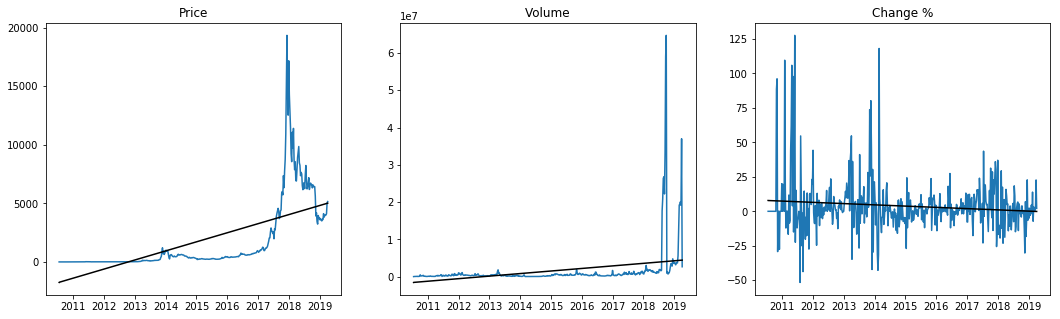

In [16]:
plotaj_tablicu(bitcoin)

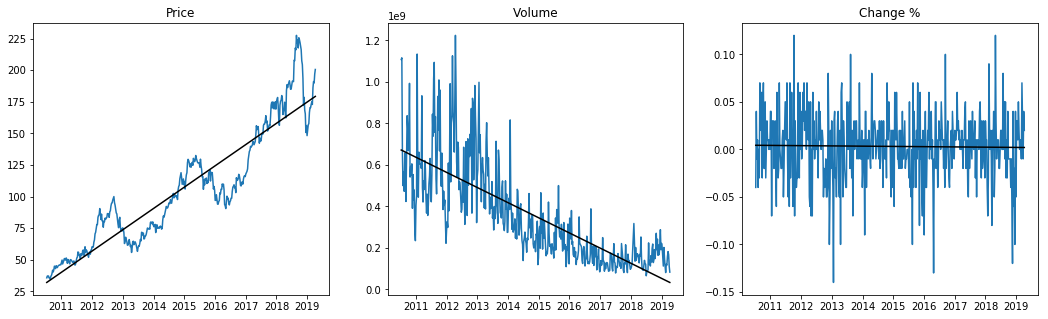

In [17]:
plotaj_tablicu(apple)

Kaže se da je tržište kriptovaluta "divlje" tržište što se vidi i iz ovih grafova. 
- Cijena Bitcoin-a je nenormalno porasla u kratkom vremenu dok je Apple-ova cijena vrlo stabilna te se lagano povećavala tokom vremena. 
- Volumen se nenormalno mijenja u kratkom vremenu (pogotovo u zadnjih godinu dana) te nam pravac na tom grafu zapravo i ne govori puno, dok kod Apple-a i u tom segmentu vidimo nekakvu pravilnost što potvrđuje pravac na tom grafu.
- Vidimo i da je promjena u cijeni velika pogotovo prvih par godina, dok kod Apple-a ta promjena prati nekakvu pravilnost. To nam jos govori i ovaj pravac dobivec linearnom regresijom

Analizirajmo malo bolje ove stvari:

In [18]:
def analiziraj_cijene(tablica1, tablica2):
    """
    Funkcija za analiziranje cijene između dvije valute.
    
    Argumenti su dva DataFrame-a nad kojima želimo analizirati cijenu.
    Ukoliko oni nemaju stupac 'Price' koji je numeric, funkcija neće raditi na očekivan način.
    
    Povratni tip je DataFrame koji sadrži rezultate analize.
    """
    
    
    print('Analiza cijene kod ' + tablica1.name + '-a i ' + tablica2.name + '-a: \n')
    
    min1 = tablica1['Price'].min()
    max1 = tablica1['Price'].max()
    min2 = tablica2['Price'].min()
    max2 = tablica2['Price'].max()

    data = [
        ['min', min1, min2], 
        ['max', max1, max2],
        ['range', max1-min1, max2-min2],
        ['mean', round(tablica1['Price'].mean(), 2), round(tablica2['Price'].mean(), 2)],
        ['std', round(tablica1['Price'].std(), 2), round(tablica2['Price'].std(), 2)]
    ]
    
    return pd.DataFrame(data, columns=['Info', tablica1.name, tablica2.name])


def analiziraj_volumene(tablica1, tablica2):
    """
    Funkcija za analiziranje vrijednosti volumena između dvije valute.
    
    Argumenti su dva DataFrame-a nad kojima želimo analizirati volumen.
    Ukoliko oni nemaju stupac 'Volume' koji je numeric, funkcija neće raditi na očekivan način.
    
    Povratni tip je DataFrame koji sadrži rezultate analize.
    """
    
    
    print('Analiza volumena kod ' + tablica1.name + '-a i ' + tablica2.name + '-a: \n')
    
    data = [
        ['min', tablica1['Volume'].min(), tablica2['Volume'].min()], 
        ['max', tablica1['Volume'].max(), tablica2['Volume'].max()],
        ['ukupni vol.', round(tablica1['Volume'].sum(), 2), round(tablica2['Volume'].sum(), 2)],
        ['prosjecni vol.', round(tablica1['Volume'].mean(), 2), round(tablica2['Volume'].mean(), 2)]
    ]

    return pd.DataFrame(data, columns=['Info', tablica1.name, tablica2.name])


def analiziraj_promjenu(tablica1, tablica2):
    """
    Funkcija za analiziranje promjene(u postotcima) cijena kroz tjedne između dvije valute
    
    Argumenti su dva DataFrame-a nad kojima želimo analizirati promjene.
    Ukoliko oni nemaju stupac 'Change %' koji je numeric, funkcija neće raditi na očekivan način.
    
    Povratni tip je DataFrame koji sadrži rezultate analize.
    """
    
    
    print('Analiza promjene cijena kroz tjedne kod ' + tablica1.name + '-a i ' + tablica2.name + '-a: \n')
    
    data = [
        ['min', tablica1['Change %'].min(), tablica2['Change %'].min()], 
        ['max', tablica1['Change %'].max(), tablica2['Change %'].max()],
        ['prosjecna promjena', round(tablica1['Change %'].mean(), 2), round(tablica2['Change %'].mean(), 2)]
    ]

    return pd.DataFrame(data, columns=['Info', tablica1.name, tablica2.name])

In [19]:
analiziraj_cijene(bitcoin, apple)

Analiza cijene kod Bitcoin-a i Apple-a: 



,Info,Bitcoin,Apple
0,min,0.00,34.517
1,max,19345.50,227.630
2,range,19345.50,193.113
3,mean,1632.23,105.680
4,std,2990.79,46.190


Iz ove tablice se jasno vide neke stvari poput range-a i std-a. To samo ide u prilog tome da se radi o "divljem" tržištu.

In [20]:
analiziraj_volumene(bitcoin, apple)

Analiza volumena kod Bitcoin-a i Apple-a: 



,Info,Bitcoin,Apple
0,min,2.000000e+01,6.577550e+07
1,max,6.474000e+07,1.224138e+09
2,ukupni vol.,6.499579e+08,1.611803e+11
3,prosjecni vol.,1.422227e+06,3.526921e+08


Iz ove tablice možemo uočiti da Bitcoin po pitanju volumena ne zaostaje toliko za Apple-om (gledajući samo razdoblje od nastanka Bitcoin-a do danas). Zanimljiva je činjenica da ukupni volumen Bitcoin-a, usprkos prvih par godina gdje se nije baš trgovalo Bitcoin-om, nije toliko ni puno manji od ukupnog volumena Apple-a.

Pogledajmo taj volumen malo bolje, recimo unazad godinu dana:

In [21]:
bitcoin_nedavno = bitcoin[np.logical_and(bitcoin.index.year >= dt.now().year - 1, bitcoin.index.month >= dt.now().month)]
bitcoin_nedavno.name = 'Bitcoin'
apple_nedavno = apple[np.logical_and(apple.index.year >= dt.now().year - 1, apple.index.month >= dt.now().month)]
apple_nedavno.name = 'Apple'

usporedba_nedavno = analiziraj_volumene(bitcoin_nedavno, apple_nedavno)
usporedba_nedavno

Analiza volumena kod Bitcoin-a i Apple-a: 



,Info,Bitcoin,Apple
0,min,685440.0,6.577550e+07
1,max,64740000.0,2.876943e+08
2,ukupni vol.,330191860.0,6.619370e+09
3,prosjecni vol.,8053460.0,1.576040e+08


In [22]:
usporedba_nedavno['Apple'] / usporedba_nedavno['Bitcoin'] 

0    95.960989
1     4.443842
2    20.047041
3    19.569730
dtype: float64

Imao sam dojam da će odnos ovih statistika volumena biti ipak malo bliži jedinici, ali nije tako. Ipak se ispostavlja da ljudi više trguju Apple-om nego Bitcoin-om i u zadnje vrijeme jer recimo brojka od 32, koja je došla od odnosa ukupnih volumena, nije baš mala kada malo bolje razmislimo o kakvim iznosima se radi (velikim).

No, ovdje se ipak radi samo o volumenu. Htjeli bi vidjeti koliko novaca je zapravo uloženo u Bitcoin, a koliko u Apple. Pošto vidimo da nema velike razlike između volumena gledanog od postanka Bitcoin-a do danas i volumena u zadnjih godinu dana, analizirajmo prvu situaciju:

In [23]:
(bitcoin['Volume'] * bitcoin['Price']).sum() / (apple['Volume'] * apple['Price']).sum()

0.23450502226460945

Uočavamo da se u Bitcoin, koji je najjači "igrač" među kriptovalutama, više od 4 puta manje ulaže u njega nego u Apple. Ova informacija će nam kasnije poslužiti prilikom analiziranja uloženog novca i u druge valute.

In [24]:
analiziraj_promjenu(bitcoin, apple)

Analiza promjene cijena kroz tjedne kod Bitcoin-a i Apple-a: 



,Info,Bitcoin,Apple
0,min,-51.59,-0.14
1,max,127.59,0.12
2,prosjecna promjena,3.87,0.00


Ova tablica možda najbolje opisuje volatilnost Bitcoin-a. Promjene tokom tjedna su vrlo male kod Apple-a, ali kod Bitcoin-a je to dosta drugačije. Osobi koja trguje stabilnim dionicama ili valutama je ovo nepojmljivo!

Iz ove analize možemo zaključiti kako je Bitcoin(pa i ostale kriptovalute, što ćemo vidjeti kasnije) jako nesigurna valuta koja se podosta razlikuje od neke stabilne dionice kao što je Apple.

Krenimo na usporedbu Bitcoin-a i ostalih valuta:

-------------------------------------------------------------------------------------------------------------------

## Bitcoin vs. ostali <a name="btcvsostali"></a>

Prvo što želimo napraviti su tablice naših kriptovaluta koje prikazuju cijenu, volumen i promjenu valute od nekog fiksnog vremena do danas. To želimo napraviti jer nam sve 4 tablice prikazuju različit raspon vremena te bi na grafovima bilo lakše uočiti neke stvari kada bi sve tablice prikazivale isti raspon.

In [25]:
def min_datum(tablice):
    """
    Funkcija koja pronalazi minimalni datum kojim možemo prikazati maksimalne 
    informacije u svim tablicama.
    
    Argument 'tablice' je lista DataFrame-ova za koje tražimo taj minimalni datum.
    Ukoliko ti DataFrame-ovi nemaju DatetimeIndex za index, funkcija bi mogla raditi na neočekivan način.
    
    Povratna vrijednost je Timestamp datum.
    """ 
    
    trazeni_datum = tablice[0].index.min()
    
    for tablica in tablice:
        if( tablica.index.min() > trazeni_datum ):
            trazeni_datum = tablica.index.min()
        
    return trazeni_datum

In [26]:
pocetni_datum = min_datum(kriptovalute)

bitcoin2 = bitcoin[bitcoin.index >= pocetni_datum]
bitcoin2.name = 'Bitcoin'
ethereum2 = ethereum[ethereum.index >= pocetni_datum]
ethereum2.name = 'Ethereum'
ripple2 = ripple[ripple.index >= pocetni_datum]
ripple2.name = 'Ripple'
litecoin2 = litecoin[litecoin.index >= pocetni_datum]
litecoin2.name = 'Litecoin'

kriptovalute2 = [bitcoin2, ethereum2, ripple2, litecoin2]

Prvo prikažimo grafove svih stupaca svih ovih novih tablica

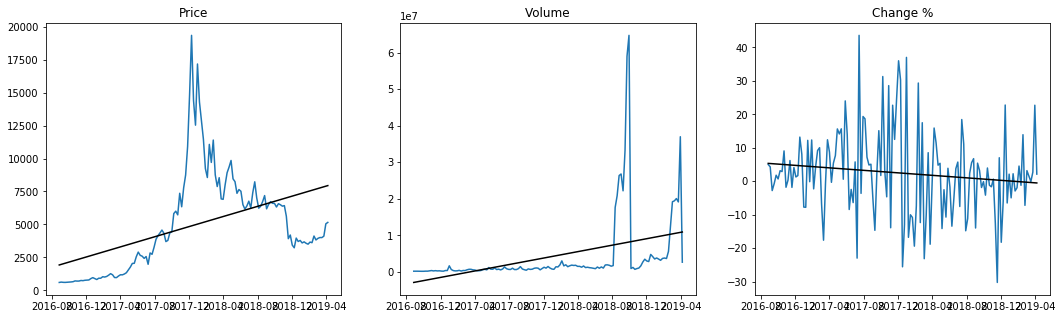

In [27]:
plotaj_tablicu(bitcoin2)

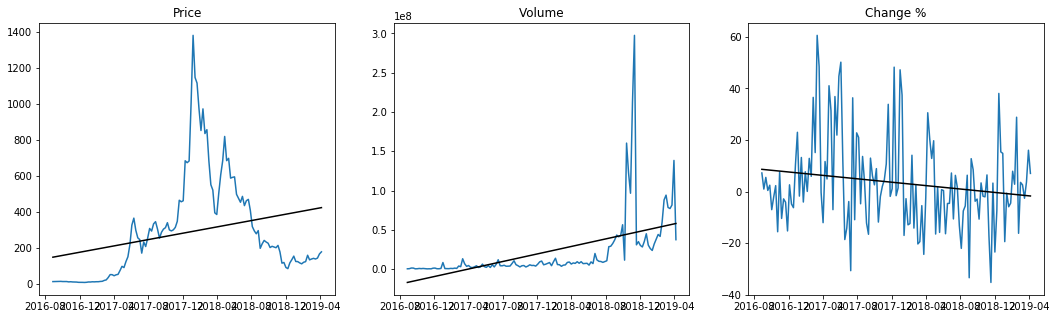

In [28]:
plotaj_tablicu(ethereum2)

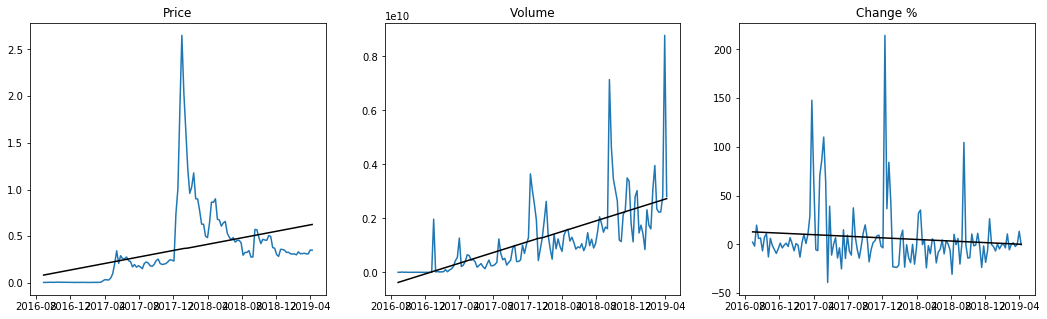

In [29]:
plotaj_tablicu(ripple2)

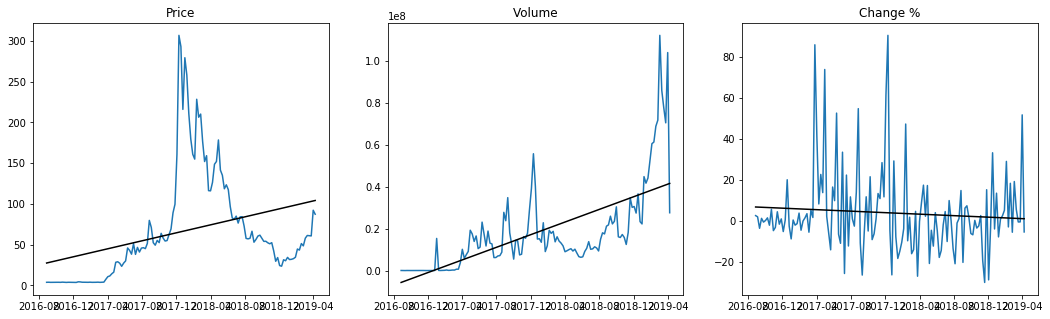

In [30]:
plotaj_tablicu(litecoin2)

Čovjek bi na prvu pomislio da se radi o istim valutama i da su podaci uzeti sa različitih izvora pa se malo razlikuju, ali to nije tako. Jedna od posebnosti tržišta kriptovaluta je ta da većina kriptovaluta prati isti trend te se ponaša slično. Razlog tome je da mnoge burze kriptovaluta nemaju mogućnost kupovine kriptovalute u npr. dolarima nego nude kupovinu kriptovaluta pomoću Bitcoin-a i Ethereum-a(najviše), ali i ponekad možemo vidjeti da nude kupovinu drugih kriptovaluta u Ripple-u ili Litecoin-u. Ima još razloga za ovo u koje nećemo ulaziti. Sve u svemu, izabrali smo neke od najpoznatnijih i najpopularnijih valuta i zbog tog razloga se one slično ponašaju po cijeni, volumenu i promjeni

No, za svaki slučaj, probajmo to pokazati i računski:

In [31]:
# provjerimo imamo li 0(nulu) u nekom stupcu od tablice ethereum2, ripple2 ili litecoin2
for kriptovaluta in kriptovalute2:
    for stupac in list(kriptovaluta.columns.values):
        mask = kriptovaluta[stupac] == 0
        if(mask.sum() > 0):
            print('Imamo vrijednost 0 u tablici ' + kriptovaluta.name + ' i to su redovi: ')
            print(kriptovaluta[mask])

Imamo vrijednost 0 u tablici Litecoin i to su redovi: 
            Price    Volume  Change %
Date                                 
2017-02-12   3.84  109150.0       0.0


In [32]:
# promijenit ćemo tu vrijednost u 0.1. Nećemo puno izgubiti na tome a i
# najlakše nam je to sada napraviti. Također, ne zanima nas baš tolika preciznost
litecoin2['Change %']['2017-02-12'] = 0.1

In [33]:
btc_vs_eth = bitcoin2 / ethereum2
btc_vs_eth.name = 'Bitcoin vs. Ethereum'

btc_vs_xrp = bitcoin2 / ripple2
btc_vs_xrp.name = 'Bitcoin vs. Ripple'

btc_vs_ltc = bitcoin2 / litecoin2
btc_vs_ltc.name = 'Bitcoin vs. Litecoin'

In [34]:
def ispisi_statistiku(tablica):
    """
    Funkcija koja ispisuje srednju vrijednost, raspon i standardnu devijaciju za sve stupce pojedine tablice.
    
    Argument je DataFrame koji posjeduje sve numeric vrijednosti. 
    U suprotnom bi funkcija mogla raditi na neočekivan način.
    
    Povratne vrijednosti nema.
    """
    
    
    print(tablica.name + ': ')
    for stupac in list(tablica.columns.values):
        print('Stupac ' + stupac + ': ')
        print('Srednja vrijednost: ' + str(tablica[stupac].mean()))
        print('Raspon vrijednosti: ' + str(tablica[stupac].max() - tablica[stupac].min()))
        print('Standardna devijacija: ' + str(tablica[stupac].std()))
        print('\n')
    print('\n')

In [35]:
ispisi_statistiku(btc_vs_eth)
ispisi_statistiku(btc_vs_xrp)
ispisi_statistiku(btc_vs_ltc)

Bitcoin vs. Ethereum: 
Stupac Price: 
Srednja vrijednost: 31.58045128923318
Raspon vrijednosti: 115.62731871391495
Standardna devijacija: 25.369289840634465


Stupac Volume: 
Srednja vrijednost: 0.2517269497898794
Raspon vrijednosti: 1.3818447728231469
Standardna devijacija: 0.2212542144314449


Stupac Change %: 
Srednja vrijednost: 0.308302279921908
Raspon vrijednosti: 69.01890756302521
Standardna devijacija: 5.500785697631498




Bitcoin vs. Ripple: 
Stupac Price: 
Srednja vrijednost: 40103.87170949917
Raspon vrijednosti: 204803.04347826086
Standardna devijacija: 48689.535163437715


Stupac Volume: 
Srednja vrijednost: 0.013472852716875204
Raspon vrijednosti: 0.14427227208313653
Standardna devijacija: 0.030069919478238488


Stupac Change %: 
Srednja vrijednost: 0.5719123593210007
Raspon vrijednosti: 353.58333333333326
Standardna devijacija: 23.245500911728282




Bitcoin vs. Litecoin: 
Stupac Price: 
Srednja vrijednost: 112.2338719070291
Raspon vrijednosti: 265.9313205752294
Standard

Vidimo da se zapravo samo omjer volumena ponaša slično kao konstanta, dok za cijenu i promjenu to ne možemo reći. No, smatram da i sama ova informacija za volumen opravdava slično kretanje cijene kod ovih kriptovaluta. 

Pogledajmo omjer uloženog novca u Bitcoin i ostale kriptovalute pa probajmo iz toga nešto zaključiti:

In [36]:
novci_btc2 = (bitcoin2['Volume'] * bitcoin2['Price']).sum()
novci_eth2 = (ethereum2['Volume'] * ethereum2['Price']).sum()
novci_xrp2 = (ripple2['Volume'] * ripple2['Price']).sum()
novci_ltc2 = (litecoin2['Volume'] * litecoin2['Price']).sum()

In [37]:
print('Omjer uloženog novca Bitcoin vs. Ethereum:')
print((novci_btc2/novci_eth2).round(2))
print('\n')

print('Omjer uloženog novca Bitcoin vs. Ripple:')
print((novci_btc2/novci_xrp2).round(2))
print('\n')

print('Omjer uloženog novca Bitcoin vs. Litecoin:')
print((novci_btc2/novci_ltc2).round(2))
print('\n')

Omjer uloženog novca Bitcoin vs. Ethereum:
5.03


Omjer uloženog novca Bitcoin vs. Ripple:
39.5


Omjer uloženog novca Bitcoin vs. Litecoin:
16.29




Možemo vidjeti da je Bitcoin stvarno "najjača" kriptovaluta po pitanju ulaganja novaca. Ove informacije i informacija koja kaže da se u Bitcoin ulaže 4 puta manje nego u Apple zapravo govore koliko tržište kriptovaluta još uvijek nije doraslo nekim drugim tržištima poput NASDAQ-a. Upravo i ovo smatram razlogom sličnom kretanju cijena svih kriptovaluta. Naime, to tržište nije postalo toliko veliko i međusobno neovisno da svaka kriptovaluta ima svoje neke zasebne kretnje.

Pokušajmo predvidjeti buduće cijene kriptovaluta na osnovu linearne regresije, čisto ako se netko odluči, na osnovu linearne regresije :D, uložiti u neku od ovih valuta. Gledat ćemo samo razdoblje od kada je i Litecoin izašao (jer je on nastao najkasnije od njih svih)

## Zaključak <a name="zaklj"></a>

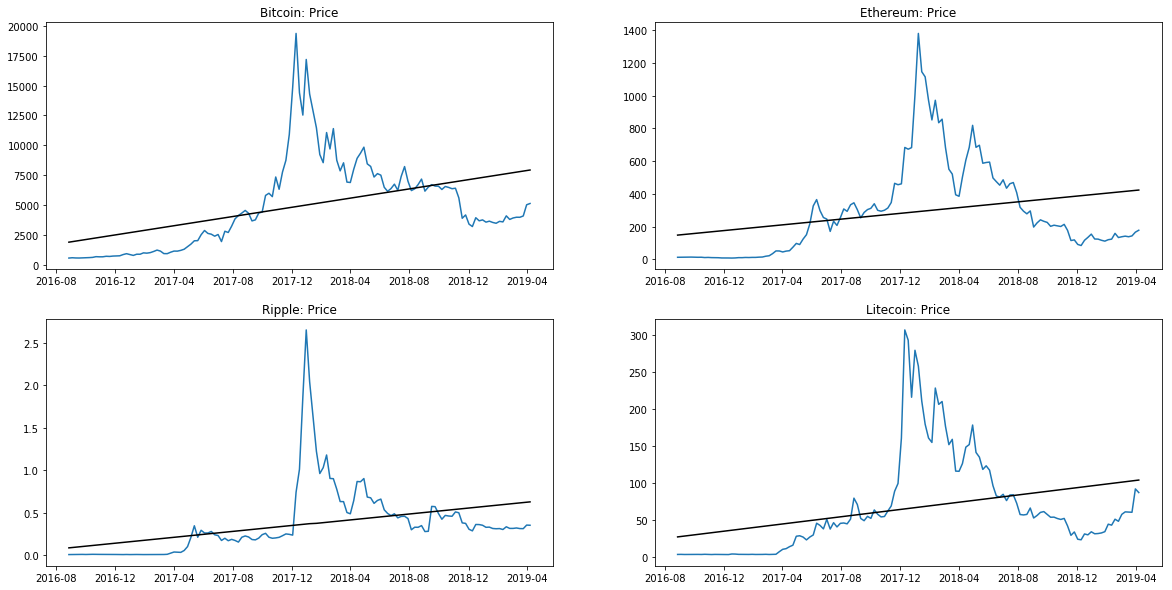

In [38]:
predvidanje = {}
fig, subplots = plt.subplots(2, 2, figsize=(20, 10))

for i in range(len(kriptovalute2)):
    # plotat ćemo sve da imamo i vizualni prikaz
    subplots[i//2, i%2].set_title(kriptovalute2[i].name + ': Price')
    subplots[i//2, i%2].plot(kriptovalute2[i].index, kriptovalute2[i]['Price'])

    x = np.arange(kriptovalute2[i].shape[0])
    fit = np.polyfit(x, kriptovalute2[i]['Price'], 1)
    fit_fn = np.poly1d(fit)
    subplots[i//2, i%2].plot(kriptovalute2[i].index, fit_fn(x), 'k-')
    
    predvidanje[kriptovalute2[i].name] = fit_fn

In [39]:
print('Dimenzija od ' + bitcoin2.name + ': ' + str(bitcoin2.shape[0]))
print('Dimenzija od ' + ethereum2.name + ': ' + str(ethereum2.shape[0]))
print('Dimenzija od ' + ripple2.name + ': ' + str(ripple2.shape[0]))
print('Dimenzija od ' + litecoin2.name + ': ' + str(litecoin2.shape[0]))

Dimenzija od Bitcoin: 137
Dimenzija od Ethereum: 137
Dimenzija od Ripple: 136
Dimenzija od Litecoin: 137


Pošto se radi o razdoblju od nekih 3 godine (2016-08 do 2019-04), x ćemo namjestiti da bude za 1/3 veći
od skupa nad kojim smo napravili linearnu regresiju. Tako ćemo dobiti približnu cijenu nakon godinu dana. Pošto sve tablice imaju istu 0-tu dimenziju,
osim ripple2-a koji je nastao iz ripple-a iz kojeg smo morali izbaciti redove koji su imali oznaku '-'
za neke vrijednosti stupca 'Volume', x ćemo dobiti iz dimenzije tablice bitcoin2. Nije nam toliko bitno imali li
ripple2 istu veličinu 0-te dimenzije jer je razlika u dimenziji minimalna.

In [40]:
predvidanje

{'Bitcoin': poly1d([  44.27912987, 1924.66296414]),
 'Ethereum': poly1d([  2.02453297, 147.5405173 ]),
 'Ripple': poly1d([0.00400923, 0.084921  ]),
 'Litecoin': poly1d([ 0.56403844, 27.5444297 ])}

In [41]:
x = bitcoin2.shape[0] + bitcoin2.shape[0] / 3

for kriptovaluta in kriptovalute2:
    print('Predvidanje cijene nakon godinu dana za ' + kriptovaluta.name + ': ')
    print(str(predvidanje[kriptovaluta.name](x)))

Predvidanje cijene nakon godinu dana za Bitcoin: 
10012.984021256867
Predvidanje cijene nakon godinu dana za Ethereum: 
517.3552061281508
Predvidanje cijene nakon godinu dana za Ripple: 
0.8172739373121511
Predvidanje cijene nakon godinu dana za Litecoin: 
130.57545187024343


Za šećer na kraju bih volio priložiti izjavu jednog od nautjecajnijih ljudi današnjice u IT sektoru John McAfee-a. Ako vas ove predikcije, koje su na osnovu linearne regresije, nisu uvjerile da uložite u Bitcoin, onda bi vas valjda ova pametna izjava trebala na to nagovoriti :D

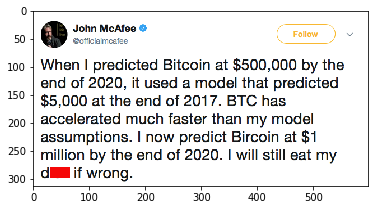

In [42]:
slika = plt.imread('mcafee_izjava.png')
plt.imshow(slika)